In [266]:
import os
import pandas
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [267]:
train_data = pandas.read_csv('data/train.csv')
test_data = pandas.read_csv('data/test.csv')

In [268]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
%matplotlib inline
from matplotlib import pyplot as plt

In [270]:
def embarked_to_float(letter):
    if letter == 'S':
        return 1.0
    elif letter == 'C':
        return 2.0
    elif letter == 'Q':
        return 3.0
    else:
        return 0.0

In [271]:
def build_train(data):
    return np.array([map(float, 
     [data['Pclass'][i], 
      data['Sex'][i] == 'male', 
      data['Age'][i], 
      data['SibSp'][i], 
      data['Parch'][i], 
      data['Fare'][i],
      embarked_to_float(data['Embarked'][i]),
      data['Survived'][i]]) 
     for i in xrange(data.shape[0])
      if data['Age'][i] == data['Age'][i] and
         data['Embarked'][i] == data['Embarked'][i]])

def build_test(data):
    return np.array([map(float, 
     [data['Pclass'][i], 
      data['Sex'][i] == 'male', 
      data['Age'][i], 
      data['SibSp'][i], 
      data['Parch'][i], 
      data['Fare'][i],
      embarked_to_float(data['Embarked'][i])]) 
     for i in xrange(data.shape[0])])

In [272]:
cleaned_train = build_train(train_data)
cleaned_test = build_test(test_data)
cleaned_test[np.isnan(cleaned_test)] = 0.0

In [273]:
cleaned_train

array([[ 3.    ,  1.    , 22.    , ...,  7.25  ,  1.    ,  0.    ],
       [ 1.    ,  0.    , 38.    , ..., 71.2833,  2.    ,  1.    ],
       [ 3.    ,  0.    , 26.    , ...,  7.925 ,  1.    ,  1.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ..., 30.    ,  1.    ,  1.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  2.    ,  1.    ],
       [ 3.    ,  1.    , 32.    , ...,  7.75  ,  3.    ,  0.    ]])

In [274]:
def plot_probs(arr, surv_arr):
    totals = {key: 0 for key in np.unique(arr)}
    survived = {key: 0 for key in np.unique(arr)}
    prob = {key: 0 for key in np.unique(arr)}
    for i, thing in enumerate(arr):
        totals[thing] += 1.0
        if surv_arr[i]:
            survived[thing] += 1.0
    for i in arr:
        prob[i] = survived[i] / totals[i]
    return plt.bar(np.array(prob.items()).T[0], np.array(prob.items()).T[1])

<Container object of 3 artists>

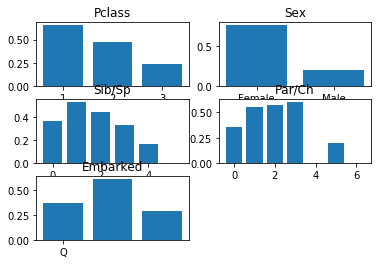

In [275]:
plt.subplot(3, 2, 1)
plt.title("Pclass")
plot_probs(cleaned_train.T[0], cleaned_train.T[-1])

plt.subplot(3, 2, 2)
plt.title("Sex")
plt.xticks([0, 1], ["Female", "Male"])
plot_probs(cleaned_train.T[1], cleaned_train.T[-1])

plt.subplot(3, 2, 3)
plt.title("Sib/Sp")
plot_probs(cleaned_train.T[3], cleaned_train.T[-1])

plt.subplot(3, 2, 4)
plt.title("Par/Ch")
plot_probs(cleaned_train.T[4], cleaned_train.T[-1])

plt.subplot(3, 2, 5)
plt.title("Embarked")
plt.xticks([-1, 0, 1], ['S', 'C', 'Q'])
plot_probs(cleaned_train.T[6], cleaned_train.T[-1])

In [276]:
train_set = np.delete(cleaned_train, len(cleaned_train[0]) - 1, axis=1)
survivor_set = cleaned_train[: , -1]

In [277]:
train_set

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  2.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ...,  0.    , 30.    ,  1.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  2.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  3.    ]])

In [278]:
survivor_set

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0.

In [279]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')

In [280]:
classifier.fit(train_set, survivor_set)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [281]:
classifier.score(train_set, survivor_set)

0.7176966292134831

In [282]:
cross_val_score(classifier, train_set, survivor_set)

array([0.60084034, 0.71729958, 0.75527426])

In [283]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [284]:
cleaned_test

array([[ 3.    ,  1.    , 34.5   , ...,  0.    ,  7.8292,  3.    ],
       [ 3.    ,  0.    , 47.    , ...,  0.    ,  7.    ,  1.    ],
       [ 2.    ,  1.    , 62.    , ...,  0.    ,  9.6875,  3.    ],
       ...,
       [ 3.    ,  1.    , 38.5   , ...,  0.    ,  7.25  ,  1.    ],
       [ 3.    ,  1.    ,  0.    , ...,  0.    ,  8.05  ,  1.    ],
       [ 3.    ,  1.    ,  0.    , ...,  1.    , 22.3583,  2.    ]])

In [285]:
prediction_tuples = zip(np.array(test_data['PassengerId']), classifier.predict(cleaned_test))

In [286]:
with open('output.csv', 'w') as file:
    file.write('PassengerId,Survived\n')
    for prediction in prediction_tuples:
        file.write(str(int(prediction[0])))
        file.write(',')
        file.write(str(int(prediction[1])))
        file.write('\n')